In [3]:
import pandas as pd

## Page Length Info

In [71]:
filename = "gene_wiki_vol_info.tsv"

In [72]:
gene_wiki_vol_info =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [81]:
gene_wiki_vol_info.shape

(121, 4)

In [73]:
gene_wiki_vol_info.head()

,title,page_length,last_touched,lastrevid
0,Surfactant protein A1,31194,2021-11-25T06:20:36Z,1056213617
1,Surfactant protein A2,31602,2021-11-19T17:21:15Z,1056087140
2,MiR-155,86517,2021-11-27T00:50:40Z,1043454804
3,Epoxide hydrolase 2,26435,2021-11-29T01:42:34Z,1041057438
4,LIG3,30861,2021-11-29T01:42:38Z,1042913008


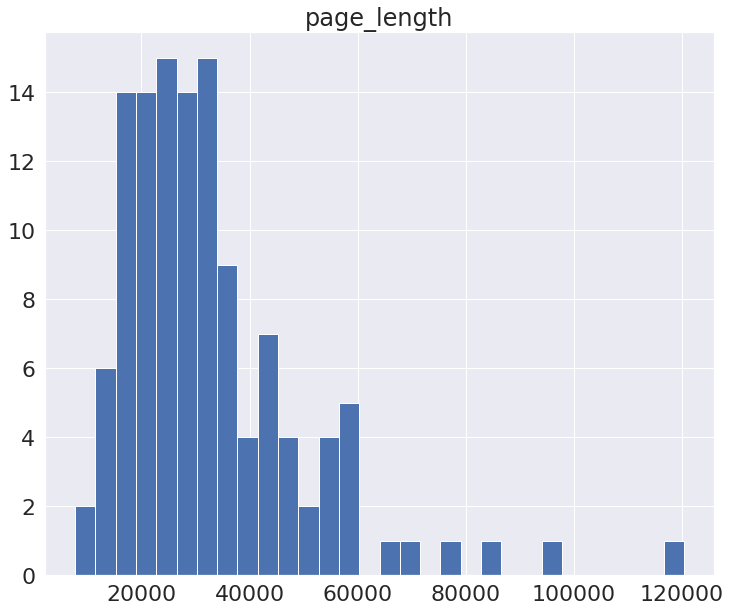

In [74]:
page_length_hist = gene_wiki_vol_info[["page_length"]].hist(bins=30)

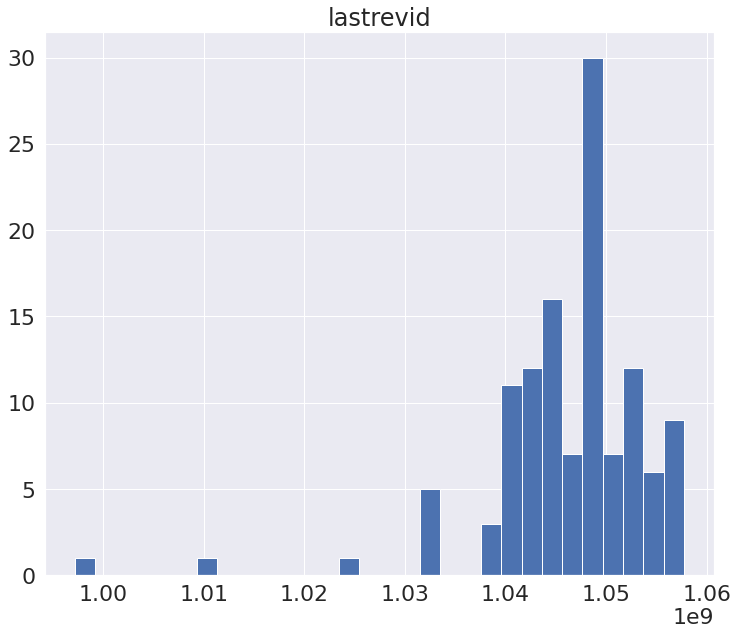

In [75]:
rev_num_hist = gene_wiki_vol_info[["lastrevid"]].hist(bins=30)

In [76]:
filename = "gene_wiki_vol_info-BEFORE.tsv"

In [77]:
gene_wiki_vol_info_before =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [86]:
gene_wiki_vol_info_before['title'] = gene_wiki_vol_info_before['title'].str.replace('_',' ')

In [87]:
gene_wiki_vol_info_before.shape

(123, 5)

In [88]:
gene_wiki_vol_info_before.head()

,title,Wikipedia update period,6 months before update,first revision prior to 6 month date,corresponding length
0,Surfactant protein A1,20120830,20120229,462319030,5903
1,Surfactant protein A2,20120830,20120229,204784710,21
2,MiR-155,20130228,20120828,502140831,49959
3,Epoxide hydrolase 2,20130531,20121130,473607874,1330
4,LIG3,20130830,20130228,481575544,1543


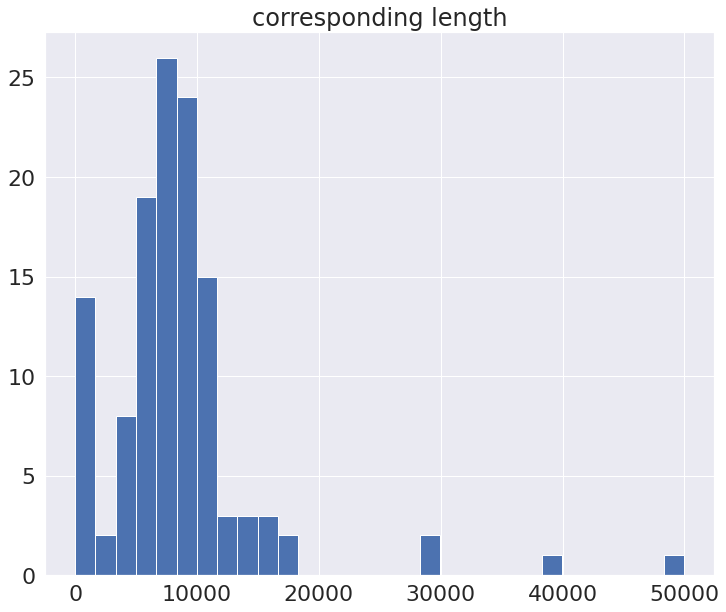

In [80]:
corr_length_hist = gene_wiki_vol_info_before[["corresponding length"]].hist(bins=30)

In [89]:
gene_wiki_vol_info_diff = gene_wiki_vol_info[["title","page_length"]].merge(gene_wiki_vol_info_before[["title", "corresponding length"]], how="left", on="title")

In [99]:
gene_wiki_vol_info_diff.sort_values(by="length_diff").tail()

,title,page_length,corresponding length,length_diff
32,"Myosin binding protein C, cardiac",68361,8810.0,59551.0
77,POLD1,75633,7620.0,68013.0
120,TRPV6,96175,6401.0,89774.0
99,CSNK1D,120341,2308.0,118033.0
44,NGLY1,24019,NaN,NaN


In [94]:
gene_wiki_vol_info_diff["length_diff"] = gene_wiki_vol_info_diff.apply(
    lambda v: v["page_length"] - v["corresponding length"], axis=1
)

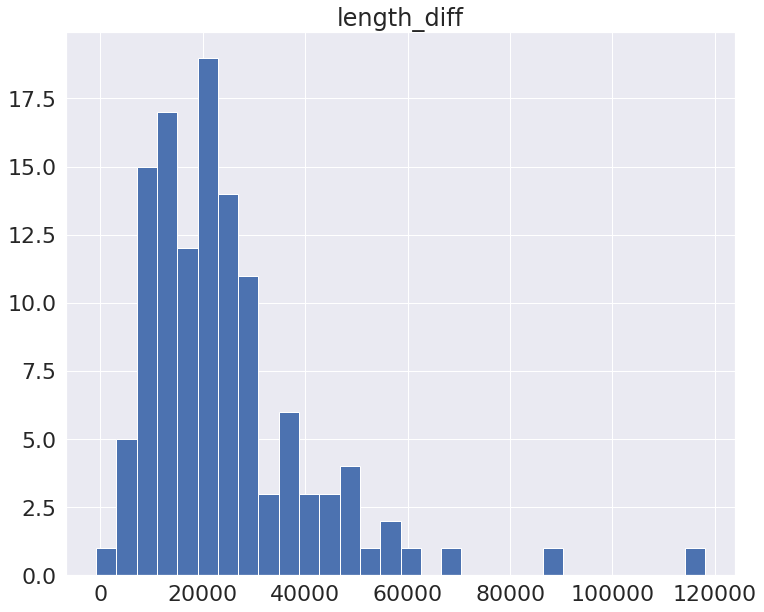

In [96]:
page_diff_hist = gene_wiki_vol_info_diff[["length_diff"]].hist(bins=30)

## Page Views Info

In [6]:
filename = "gw_pvs.tsv"

In [7]:
gw_pageviews =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [8]:
gw_pageviews.head()

,wikipedia,2015070100,2015080100,2015090100,2015100100,2015110100,2015120100,2016010100,2016020100,2016030100,...,2021010100,2021020100,2021030100,2021040100,2021050100,2021060100,2021070100,2021080100,2021090100,2021100100
0,ABCA7,230.0,157.0,213.0,235.0,264.0,152.0,232.0,168.0,214.0,...,165.0,153.0,198.0,152.0,238.0,176.0,195.0,114.0,127.0,110.0
1,AGTPBP1_(gene),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,75.0,35.0,25.0,29.0,34.0,30.0,14.0,19.0,40.0
2,ALOX15,207.0,178.0,261.0,306.0,343.0,366.0,343.0,333.0,436.0,...,516.0,445.0,538.0,471.0,438.0,421.0,298.0,333.0,402.0,380.0
3,APOA5,356.0,304.0,376.0,375.0,386.0,322.0,377.0,374.0,538.0,...,284.0,279.0,300.0,309.0,304.0,251.0,218.0,198.0,192.0,220.0
4,Apolipoprotein_D,353.0,278.0,361.0,339.0,410.0,339.0,316.0,391.0,376.0,...,333.0,306.0,405.0,352.0,356.0,409.0,222.0,228.0,249.0,257.0


In [42]:
gw_pageviews.dropna().head()

,wikipedia,2015070100,2015080100,2015090100,2015100100,2015110100,2015120100,2016010100,2016020100,2016030100,...,2021010100,2021020100,2021030100,2021040100,2021050100,2021060100,2021070100,2021080100,2021090100,2021100100
0,ABCA7,230.0,157.0,213.0,235.0,264.0,152.0,232.0,168.0,214.0,...,165.0,153.0,198.0,152.0,238.0,176.0,195.0,114.0,127.0,110.0
2,ALOX15,207.0,178.0,261.0,306.0,343.0,366.0,343.0,333.0,436.0,...,516.0,445.0,538.0,471.0,438.0,421.0,298.0,333.0,402.0,380.0
3,APOA5,356.0,304.0,376.0,375.0,386.0,322.0,377.0,374.0,538.0,...,284.0,279.0,300.0,309.0,304.0,251.0,218.0,198.0,192.0,220.0
4,Apolipoprotein_D,353.0,278.0,361.0,339.0,410.0,339.0,316.0,391.0,376.0,...,333.0,306.0,405.0,352.0,356.0,409.0,222.0,228.0,249.0,257.0
5,Atrial_natriuretic_peptide,15636.0,16499.0,20111.0,25466.0,27521.0,23412.0,22504.0,25816.0,29583.0,...,12917.0,11943.0,13349.0,12368.0,11875.0,10579.0,8570.0,8373.0,8534.0,9513.0


In [9]:
gw_pageviews.columns

Index(['wikipedia', '2015070100', '2015080100', '2015090100', '2015100100',
       '2015110100', '2015120100', '2016010100', '2016020100', '2016030100',
       '2016040100', '2016050100', '2016060100', '2016070100', '2016080100',
       '2016090100', '2016100100', '2016110100', '2016120100', '2017010100',
       '2017020100', '2017030100', '2017040100', '2017050100', '2017060100',
       '2017070100', '2017080100', '2017090100', '2017100100', '2017110100',
       '2017120100', '2018010100', '2018020100', '2018030100', '2018040100',
       '2018050100', '2018060100', '2018070100', '2018080100', '2018090100',
       '2018100100', '2018110100', '2018120100', '2019010100', '2019020100',
       '2019030100', '2019040100', '2019050100', '2019060100', '2019070100',
       '2019080100', '2019090100', '2019100100', '2019110100', '2019120100',
       '2020010100', '2020020100', '2020030100', '2020040100', '2020050100',
       '2020060100', '2020070100', '2020080100', '2020090100', '2020100100',


In [10]:
from datetime import datetime

In [11]:
testdate_str = gw_pageviews.columns[1]

In [12]:
testdate_str

'2015070100'

In [13]:
# format
format = '%Y%m%d00'

In [14]:
# convert from string format to datetime format
testdate = datetime.strptime(testdate_str, format)

In [15]:
# get the date from the datetime using date() 
# function
print(testdate.date())

2015-07-01


In [43]:
date_list = []
format = '%Y%m%d00'

avg_pageviews_all = []
avg_pageviews_w_nan = []
avg_pageviews_no_nan_genes = []
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (All Pages)"])
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (NaN is 0)"])
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (No Genes with NaN)"])

In [44]:
for date in gw_pageviews.columns:
    if (date == 'wikipedia') : continue
    else :
        date_list.append(datetime.strptime(date, format))
        avg_pageviews_all.append(gw_pageviews[[date]].mean(axis=0)[0])
        avg_pageviews_w_nan.append(gw_pageviews[[date]].fillna(0).mean(axis=0, skipna=False)[0])
        avg_pageviews_no_nan_genes.append(gw_pageviews.dropna()[[date]].mean(axis=0)[0])
        

In [45]:
gw_pv_summary["Date"] = date_list
gw_pv_summary["Average Pageviews (All Pages)"] = avg_pageviews_all
gw_pv_summary["Average Pageviews (NaN is 0)"] = avg_pageviews_w_nan
gw_pv_summary["Average Pageviews (No Genes with NaN)"] = avg_pageviews_no_nan_genes

In [46]:
gw_pageviews[[date]].mean(axis=0)

2021100100    341.344262
dtype: float64

In [47]:
print(date_list[0].date())

2015-07-01


In [48]:
print(avg_pageviews_no_nan_genes)

[489.68224299065423, 481.7196261682243, 601.2616822429907, 688.1214953271028, 685.7570093457944, 602.8598130841121, 630.0280373831775, 659.2990654205607, 751.0280373831775, 780.7757009345794, 766.2336448598131, 604.803738317757, 519.8130841121496, 529.0093457943925, 593.392523364486, 702.4392523364486, 769.3831775700935, 712.2897196261682, 720.2429906542056, 679.5514018691589, 791.607476635514, 753.1682242990654, 771.588785046729, 621.7476635514018, 540.2429906542056, 561.6915887850467, 598.2897196261682, 704.1121495327103, 734.3457943925233, 622.8691588785047, 676.7383177570093, 610.2616822429907, 694.2616822429907, 693.5514018691589, 717.8598130841121, 584.7102803738318, 541.8878504672897, 549.0467289719626, 596.2523364485982, 734.196261682243, 698.9719626168225, 609.0841121495328, 648.0747663551402, 626.4859813084112, 711.5794392523364, 698.7943925233645, 664.5514018691589, 540.8691588785047, 493.93457943925233, 475.1869158878505, 587.0280373831775, 691.4579439252336, 637.7757009345

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure

In [12]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

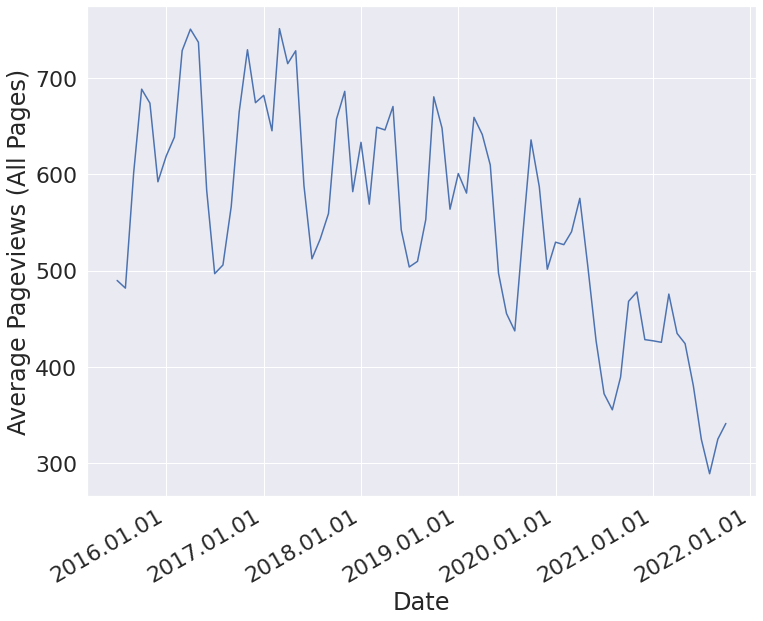

In [50]:

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (All Pages)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

<Figure size 1800x1500 with 0 Axes>

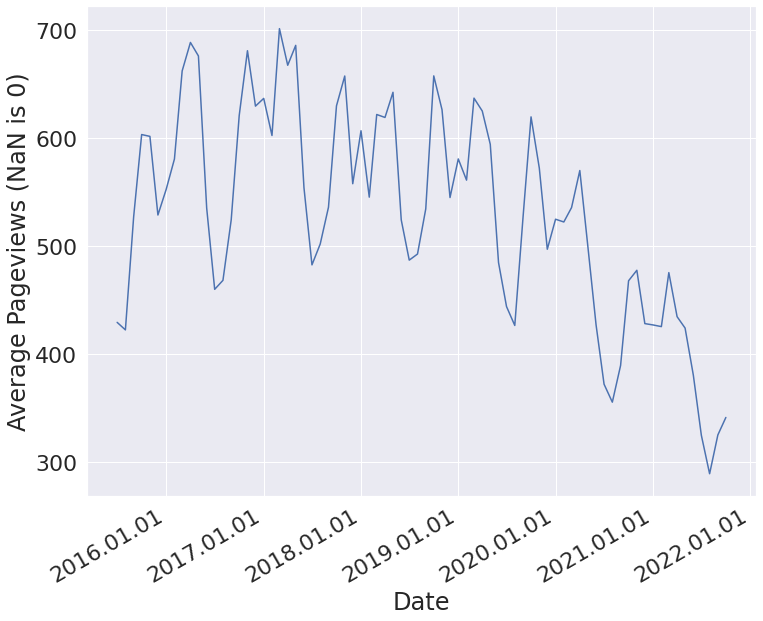

In [51]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (NaN is 0)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

<Figure size 1800x1500 with 0 Axes>

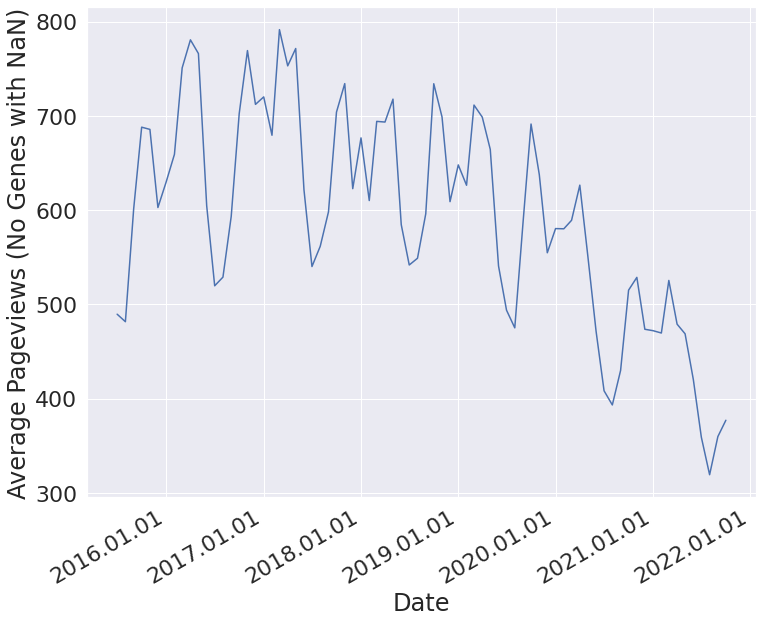

In [52]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (No Genes with NaN)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [53]:
gw_gene_total_pvs = pd.DataFrame(columns=["Gene Name", "Total Pageviews"])

In [54]:
gw_gene_total_pvs["Gene Name"] = gw_pageviews["wikipedia"]

In [55]:
gw_gene_total_pvs["Total Pageviews"] = gw_pageviews.drop(["wikipedia"], axis=1).sum(axis=1)

In [56]:
gw_gene_total_pvs = gw_gene_total_pvs.sort_values(by="Total Pageviews")

In [57]:
gw_gene_total_pvs.head()

,Gene Name,Total Pageviews
67,Melanocortin_2_receptor_accessory_protein,380.0
121,Zinc_transporter_ZIP12,797.0
1,AGTPBP1_(gene),1377.0
50,KCNE5,1945.0
105,Surfactant_protein_A2,2479.0


In [58]:
gw_gene_total_pvs.tail()

,Gene Name,Total Pageviews
19,"Collagen,_type_III,_alpha_1",149791.0
7,Binding_immunoglobulin_protein,156504.0
27,Endothelial_NOS,200146.0
33,HFE_(gene),286599.0
5,Atrial_natriuretic_peptide,1388234.0


In [59]:
filename = "gene_wiki_views.tsv"

In [60]:
gw_pageviews_raw = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [61]:
gw_pageviews_raw.head()

,title,views,granularity,timestamp,access,agent
0,Surfactant_protein_A1,146,monthly,2017090100,all-access,user
1,Surfactant_protein_A1,125,monthly,2017100100,all-access,user
2,Surfactant_protein_A1,132,monthly,2017110100,all-access,user
3,Surfactant_protein_A1,132,monthly,2017120100,all-access,user
4,Surfactant_protein_A1,127,monthly,2018010100,all-access,user


## WikiData Added Statements

In [1]:
filename = "wd_statements_added.tsv"

In [4]:
wd_statements_info = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [5]:
wd_statements_info.head()

,subjectQID,predicatePID,objectQID,subject,object
0,Q57055,P769,Q410412,paracetamol,carbamazepin
1,Q57055,P769,Q177094,paracetamol,imatinib
2,Q57055,P769,Q423364,paracetamol,propranolol
3,Q57055,P769,Q410400,paracetamol,phenytoin
4,Q57055,P769,Q422652,paracetamol,rifampicin


In [6]:
#Note: Previously we had more statements, 469 before vs 282 now

wd_statements_info.shape

(282, 5)

## Citations

In [7]:
filename = "article_citations.tsv"

In [8]:
citations = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [9]:
citations.head()

,status,Pubmed,PMCID,uri,QID,label,Total Citations from google scholar 2021.12.03
0,https://www.sciencedirect.com/science/article/...,https://pubmed.ncbi.nlm.nih.gov/34637898/,NaN,https://www.wikidata.org/wiki/Q109911528,Q109911528,The AGTPBP1 gene in neurobiology.,0.0
1,http://www.sciencedirect.com/science/article/p...,http://www.ncbi.nlm.nih.gov/pubmed/23069847,3570704,https://www.wikidata.org/wiki/Q24621202,Q24621202,Genetic complexity of the human surfactant-ass...,25.0
2,http://www.sciencedirect.com/science/article/p...,http://www.ncbi.nlm.nih.gov/pubmed/23246696,NIHMS ID 909445,https://www.wikidata.org/wiki/Q34318174,Q34318174,Regulation of the MIR155 host gene in physiolo...,378.0
3,http://www.sciencedirect.com/science/article/p...,http://www.ncbi.nlm.nih.gov/pubmed/23701967,3881560,https://www.wikidata.org/wiki/Q28291292,Q28291292,"Soluble epoxide hydrolase: gene structure, exp...",165.0
4,http://www.sciencedirect.com/science/article/p...,http://www.ncbi.nlm.nih.gov/pubmed/24013086,3733540,https://www.wikidata.org/wiki/Q34369324,Q34369324,Structure and function of the DNA ligases enco...,46.0


In [10]:
citations.shape

(94, 7)

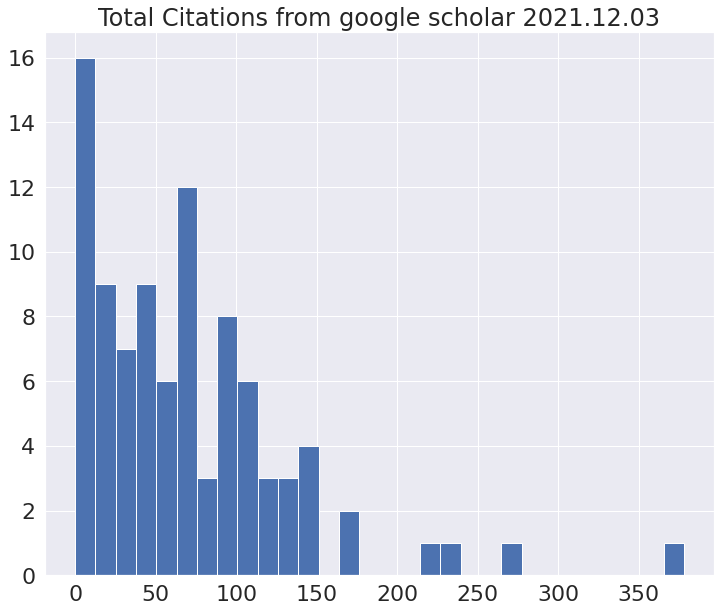

In [13]:
citation_hist = citations[["Total Citations from google scholar 2021.12.03"]].hist(bins=30)

In [14]:
citations.sort_values(by="Total Citations from google scholar 2021.12.03").head()

,status,Pubmed,PMCID,uri,QID,label,Total Citations from google scholar 2021.12.03
0,https://www.sciencedirect.com/science/article/...,https://pubmed.ncbi.nlm.nih.gov/34637898/,NaN,https://www.wikidata.org/wiki/Q109911528,Q109911528,The AGTPBP1 gene in neurobiology.,0.0
8,https://www.sciencedirect.com/science/article/...,https://pubmed.ncbi.nlm.nih.gov/34673206/,NaN,https://www.wikidata.org/wiki/Q109615004,Q109615004,"GABRB2, a key player in neuropsychiatric disor...",0.0
91,https://www.sciencedirect.com/science/article/...,https://pubmed.ncbi.nlm.nih.gov/34252531/,8318780,http://www.wikidata.org/entity/Q108806643,Q108806643,A role for zinc transporter gene SLC39A12 in t...,0.0
87,https://www.sciencedirect.com/science/article/...,https://pubmed.ncbi.nlm.nih.gov/32679290/,8459444,http://www.wikidata.org/entity/Q97559519,Q97559519,Emerging roles of melanocortin receptor access...,1.0
88,https://www.sciencedirect.com/science/article/...,https://pubmed.ncbi.nlm.nih.gov/33189799/,7803032,http://www.wikidata.org/entity/Q102060922,Q102060922,KALRN: a central regulator of synaptic functio...,2.0


In [15]:
citations.sort_values(by="Total Citations from google scholar 2021.12.03").tail()

,status,Pubmed,PMCID,uri,QID,label,Total Citations from google scholar 2021.12.03
71,http://www.sciencedirect.com/science/article/p...,https://www.ncbi.nlm.nih.gov/pubmed/28237823,5391259,http://www.wikidata.org/entity/Q39151066,Q39151066,Krüppel-like factor 4 (KLF4): What we currentl...,232.0
51,http://www.sciencedirect.com/science/article/p...,http://www.ncbi.nlm.nih.gov/pubmed/26772908,4756657,http://www.wikidata.org/entity/Q28272095,Q28272095,Epithelial sodium channel (ENaC) family: Phylo...,269.0
2,http://www.sciencedirect.com/science/article/p...,http://www.ncbi.nlm.nih.gov/pubmed/23246696,NIHMS ID 909445,https://www.wikidata.org/wiki/Q34318174,Q34318174,Regulation of the MIR155 host gene in physiolo...,378.0
92,http://www.sciencedirect.com/science/article/p...,https://www.ncbi.nlm.nih.gov/pubmed/27771451,NIHMS: 964889,"Reneged on obligation, not part of series anymore",NaN,NaN,NaN
93,https://www.sciencedirect.com/science/article/...,https://www.ncbi.nlm.nih.gov/pubmed/29704633,NaN,"Reneged on obligation, not part of series anymore",NaN,NaN,NaN
